In [1]:
# load dependencies
from matplotlib import pyplot as plt
import pandas as pd
from sqlalchemy import create_engine
import scipy.stats as st

In [2]:
# read in files
happiness_2018_index = pd.read_csv('../Data/happiness_index_2018.csv')
alcohol_consumption = pd.read_csv('../Data/alcohol_consumption.csv')
happiness_2015_index = pd.read_csv('../Data/happiness_index_2015.csv')

# merge csv files
df = pd.merge(happiness_2018_index, alcohol_consumption, on='Country', how='outer')

# df_2015 = pd.merge(df, happiness_2015_index, on='Country', how="outer")

# check the file has been read in
df.head()

,Overall rank,Country,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Country Code,Indicator Name,Indicator Code,2000,2005,2010,2015,2018
0,1.0,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393,FIN,Total alcohol consumption per capita (liters o...,SH.ALC.PCAP.LI,11.69,13.11,12.59,11.18,10.78
1,2.0,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340,NOR,Total alcohol consumption per capita (liters o...,SH.ALC.PCAP.LI,7.95,8.87,8.94,7.52,7.41
2,3.0,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408,DNK,Total alcohol consumption per capita (liters o...,SH.ALC.PCAP.LI,12.67,12.29,11.00,10.36,10.26
3,4.0,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138,ISL,Total alcohol consumption per capita (liters o...,SH.ALC.PCAP.LI,7.03,7.74,7.50,8.74,9.12
4,5.0,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357,CHE,Total alcohol consumption per capita (liters o...,SH.ALC.PCAP.LI,12.49,11.64,11.41,11.58,11.53


In [3]:
# clean dataframe with only the relevant data
df = df[['Country', 'Country Code', 'Score', 'GDP per capita','2018']]

# check dataframe for any errors
df = df.dropna()

# rename columns

df =df.rename(columns={"2018": "2018 - Total alcohol consumption per capita (liter)"})

df

,Country,Country Code,Score,GDP per capita,2018 - Total alcohol consumption per capita (liter)
0,Finland,FIN,7.632,1.305,10.78
1,Norway,NOR,7.594,1.456,7.41
2,Denmark,DNK,7.555,1.351,10.26
3,Iceland,ISL,7.495,1.343,9.12
4,Switzerland,CHE,7.487,1.420,11.53
...,...,...,...,...,...
148,Liberia,LBR,3.495,0.076,6.12
150,Rwanda,RWA,3.408,0.332,8.95
152,Tanzania,TZA,3.303,0.455,11.27
154,Central African Republic,CAF,3.083,0.024,2.38


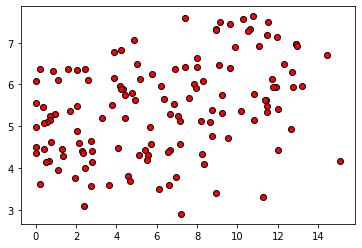

<Figure size 432x288 with 0 Axes>

In [4]:
# data check
alcohol_c = df["2018 - Total alcohol consumption per capita (liter)"]
score = df['Score']

# create and format plot
plt.scatter(alcohol_c, score, marker="o", facecolors="red", edgecolors="black")

# show plot
plt.show()
plt.tight_layout()


In [5]:
corr = st.pearsonr(alcohol_c,score)

corr

(0.3735746852735518, 8.087619218763933e-06)

### CREATE DATABASE CONNECTION

In [6]:
# import dependencies
import sqlite3
from sqlalchemy import create_engine

In [7]:
# create connection and export data

con = sqlite3.connect("../data/project2.sqlite")

data = df.to_sql(name='df', con=con, if_exists='replace', index=False)

C:\Users\joanc\anaconda3\lib\site-packages\pandas\core\generic.py:2605: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  sql.to_sql(


In [8]:
# preview table
table = pd.read_sql_query("SELECT * from df", con)

table

,Country,Country Code,Score,GDP per capita,2018 - Total alcohol consumption per capita (liter)
0,Finland,FIN,7.632,1.305,10.78
1,Norway,NOR,7.594,1.456,7.41
2,Denmark,DNK,7.555,1.351,10.26
3,Iceland,ISL,7.495,1.343,9.12
4,Switzerland,CHE,7.487,1.420,11.53
...,...,...,...,...,...
130,Liberia,LBR,3.495,0.076,6.12
131,Rwanda,RWA,3.408,0.332,8.95
132,Tanzania,TZA,3.303,0.455,11.27
133,Central African Republic,CAF,3.083,0.024,2.38
